In [4]:
#Setting working directory
import os
os.chdir('E:\\PYTHON\\K-NN')
print (os.getcwd())

E:\PYTHON\K-NN


In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from IPython.display import Image

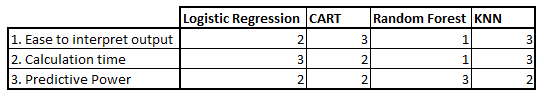

In [10]:
#------------#
# Some Basics
#------------#

# kNN and Decision Trees are believed to be two most simple and intuitive Algos
# They are simple to understand and easy to explain

# KNN can be used for both classification and regression predictive problems.
    # Find k Nearest Neighbors and take the majority vote or average as applicable
# If you would like to substitute a missing value, (whether continuous or
# Categorical) kNN might work best in some cases
# It is also very useful in building recommender systems

# kNN is also called a Lazy Learner
# A lazy learner, on the other hand, does not build any model beforehand; it waits for 
# the unclassified data and then winds it way through the algorithm to make classification 
# prediction. Lazy learners are, therefore, time consuming–each time a prediction is to be 
# made all the model building effort has to be performed again. We will see!

# KNN algorithm fairs across all parameters of considerations. 
# It is commonly used for its easy of interpretation and low calculation time.
# See below:
Image('KNN comparison.png')

In [11]:
#==============================#
# Generic steps to KNN Modeling
#==============================#

# Load the data and clean/transform/standardize as applicable
# Initialise the value of k
# For getting the predicted class, iterate from 1 to total number of training data points
    # Calculate the distance between test data and each row of training data. 
        # Here we will use Euclidean distance as our distance metric since it’s 
        # the most popular method and default one in many implementations.
        # for 'n' data points, it is almost n^2 computations you do
    # Add the distance and the index of the example to an ordered collection
    # Sort the calculated distances in ascending order based on distance values
    # Get top k rows from the sorted array (k is the number of nearest neighbors needed)
    # Get the labels of those selected k entries
    # If regression, return the mean of the K labels
    # If classification, return the mode of the K labels

# k-NN does not require an explicit training step. In k-nearest neighbor algorithm, 
# the example data is first plotted on an n-dimensional space where ‘n’ is the number 
# of data-attributes. Each point in ‘n’-dimensional space is labeled with its class value.

# To discover classification of an unclassified data, the point is plotted on this n-dimensional 
# space and class labels of nearest k data points are noted. Generally k is an odd number.

# In the generic k-NN model, each time a prediction is to be made for a data point, 
# first this data point’s distance from all other points is to be calculated and then 
# only nearest k-points can be discovered for voting. This approach is also 
# known as brute-force approach.



# Python's SKLEARN implementation is a bit optimised:
#---------------------------------------------------

# When the volume of data is huge and its dimension is also very large, say, in hundreds 
# or thousands, this repeated distance calculations can be very tedious and time consuming. 
# To fasten up this process and so as to avoid measuring distances from all the points in 
# the data set, some prepossessing of training data is done. This per-processing helps to 
# search points which are likely to be in its neighborhood.
# So, It may not be necessary to compute all n^2 pairs of distances. 
# Instead, you can use a Kd tree or a ball tree (both are data structures for 
# efficiently querying relations between a set of points).

# Scipy has a package called scipy.spatial.kdtree. 
# It does not currently support hamming distance as a metric between points. 
# However, sklearn do have an implementation of ball tree with hamming distance/
# link: https://stackoverflow.com/questions/40733497/optimize-hamming-distance-python

# kNN for Classification

In [7]:
# Read the data
df = pd.read_csv('knn_Classified Data.txt', index_col=0)
#df = pd.read_csv('http://khansingh.xyz/Datasets/BikramSr/knn_Classified Data.txt', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
df.shape

(1000, 11)

In [9]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class
# use the .drop() method to gather all features except Target Class
# axis -> argument refers to columns; a 0 would represent rows
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
# Review the array of values generated from the scaled features process
scaled_features
# Notice that we have normalized our dataset minus the target column

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [11]:
# Let us now create a dataframe of scaled features
df_scaled = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
# Let us now split the scaled data into training set and test set
# Import module to split the data
from sklearn.model_selection import train_test_split
# Set the X and ys
X = df_scaled
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=555)

In [13]:
# We are now ready to train the kNN model
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
knn = KNeighborsClassifier(n_neighbors=1)
# n_neighbors argument represents the k value, i.e. the amount of neighbors used to ID classification
# n_neighbors=1 means each sample is using itself as reference, that’s an overfitting case

# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
# Notice metric='minkowski', which represents the distance metric
# The Minkowski distance is a metric in a normed vector space which can be considered 
# as a generalization of both the Euclidean distance and the Manhattan distance.
# when p=1, minkowski represents manhattan distance (L1) and
# when p=2, minkowski represents Euclidian distance (L2)

In [14]:
# Now that the model is built, let us use ir for prediction
pred = knn.predict(X_test)
# Review the predictions
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [15]:
# Its time to evaluate our model
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix
# Print out classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       127
           1       0.86      0.90      0.88       123

   micro avg       0.88      0.88      0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [25]:
# This tells us our model was 88% accurate

In [16]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 109
FP - False Positive 18
FN - False Negative 12
TP - True Positive 111
Accuracy Rate: 0.88
Misclassification Rate: 0.12


In [17]:
# For determing the optimum value of k, you shoud ideally do multiple iterations while 
# training and then test it with testing data.
# To select the K that’s right for your data, we run the KNN algorithm several times with 
# different values of K and choose the K that reduces the number of errors we encounter 
# while maintaining the algorithm’s ability to accurately make predictions when it’s given 
# data it hasn’t seen before.

# Let us now evaluate the alternative k Values

# Let us create an empty list to capture the errors
error_rate = []
# Let us try the k values from 1 to 24
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

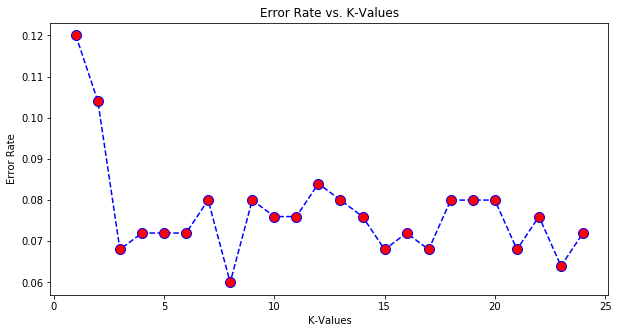

In [18]:
# It will be good to plot error rate over different k values
plt.figure(figsize=(10,5))
plt.plot(range(1,25), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [19]:
# We will retrain the model with an optimum k-value that we got from the above graph
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred_new = knn.predict(X_test)
# Print out classification report to see how better it has gotten
print(classification_report(y_test, pred_new))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       127
           1       0.93      0.95      0.94       123

   micro avg       0.94      0.94      0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [20]:
# Notice that our accuracy is 94% now.
# Let us print the confusion matrix:
cmat_new = confusion_matrix(y_test, pred_new)
#print(cmat)
print('TN - True Negative {}'.format(cmat_new[0,0]))
print('FP - False Positive {}'.format(cmat_new[0,1]))
print('FN - False Negative {}'.format(cmat_new[1,0]))
print('TP - True Positive {}'.format(cmat_new[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat_new[0,0],cmat_new[1,1]]),np.sum(cmat_new))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat_new[0,1],cmat_new[1,0]]),np.sum(cmat_new))))

TN - True Negative 118
FP - False Positive 9
FN - False Negative 6
TP - True Positive 117
Accuracy Rate: 0.94
Misclassification Rate: 0.06


In [21]:
# We can do a side by side comparison of the actual vs predicted values
Analysis = A = np.vstack([y_test, pred_new])
compare = pd.DataFrame({'Actual':Analysis[0],'Predicted':Analysis[1]})
print(compare)

     Actual  Predicted
0         0          0
1         1          0
2         0          0
3         1          1
4         0          0
5         1          0
6         0          0
7         1          1
8         0          0
9         0          0
10        1          1
11        1          1
12        1          1
13        0          0
14        1          1
15        1          1
16        1          1
17        0          0
18        0          0
19        1          1
20        0          0
21        0          0
22        1          1
23        1          0
24        1          1
25        0          0
26        0          0
27        0          0
28        0          0
29        0          0
..      ...        ...
220       1          1
221       0          0
222       0          0
223       0          0
224       1          1
225       0          0
226       1          1
227       1          1
228       1          1
229       1          0
230       0          0
231       0

In [22]:
# Let us take another look at the knn model
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')


In [33]:
# Notice that algorithm='auto', this represents the algorithm used to 
# find k nearest neighbors. Following Algos are supported in sklearn
# ‘ball_tree’ will use BallTree
# ‘kd_tree’ will use KDTree
# ‘brute’ will use a brute-force search.
# ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

# We learnt that each time a prediction is to be made for a data point, first this 
# data point’s distance from all other points is to be calculated and then only 
# nearest k-points can be discovered for voting. This is brute-force approach

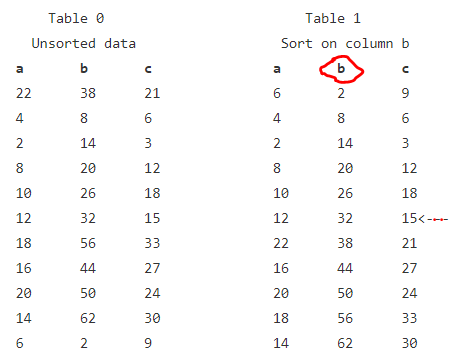

In [4]:
#==============================#
# KD_tree Data Structure
#==============================#

# k-d tree or k-dimensional tree is a binary tree of sorted hierarchical data structure
# To understand how it works, let us consider an example dataset with 3 columns a, b and c

# Step-1
#-------#
# Among the columns, find the column with greatest variance
# Then sort the data table with that attribute column
# In the below example, it is attribute 'b' that has highest variance
# Table-1 is the sorted table now
Image('kdtree_step1.PNG')

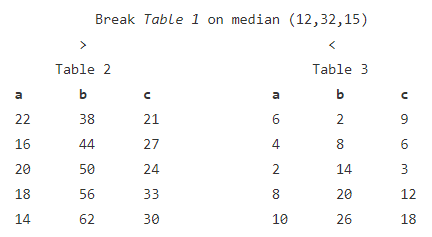

In [5]:
# Step-2
#-------#
# Divide the sorted table into two parts at the median value
# here the median value is 32 for column 'b', 
# so (12,32,15) is the median record of the table and will be considered as root node
# now divide the table-1 into two tables at the median record
Image('kdtree_step2.PNG')

In [ ]:
# Step-3
#-------#
# Consider these above two tables as two child nodes of the root node
# Next, from among the remaining attributes, we select that dimension that has the greatest variance
# Here out of 'a' and 'c', we see that highest variance is in column 'c'
# Again sort the tables (both) on column 'c' and break them at their respective medians
# Each of these tables will now create two more tables under them 
# and will go on till you stop on achieving a certain threshold

In [ ]:
# using KD Tree
#-------------#

# Once this data structure is created, it is easy to descend down to the 
# the leaf node with a bunch of records and find out the (approx) neighborhood of any point.
# The root node records can be included in any of left or right child nodes
# if there are not enough records in child nodes, the adjacent (left or right)
# child node points can also be considered
# Instead of finding the distance with all data points, KD tree is very efficient
# to find the nearest neighbors in a subset of the whole dataset
# It works best when the number of dimensions is small
# KD Tree supports only 'euclidean', 'minkowski', 'manhattan', 'chebyshev' distances

In [6]:
#==============================#
# Ball-tree Data Structure
#==============================#

# Ball-tree is also a binary tree
# To start with, two clusters (each resembling a ball) are created
# Any point in n-dimensional space will belong to either cluster but not to both
# Next, each of the balls is again subdivided into two sub-clusters (like balls)
# We keep on dividing upto a certain path or threshold is reached and stop there

In [ ]:
# using Ball Tree
#---------------#

# An unclassified (target) point must fall within any one of the nested balls
# Then identifying k nearest neighbors in that subset of data points is a lot faster
# Ball tree data structure is very efficient in situations when number of dimensions is large 
# Ball tree formation initially requires a lot of time and memory but once nested 
# hyper-spheres are created and placed in memory discovery of nearest points becomes easier.
# Ball tree supports a lot more distance metrics

In [ ]:
# Both Ball Tree and KD Tree
#--------------------------#
# Both the ball tree and kd-tree implement k-neighbor and bounded neighbor 
# searches, and can use either a single tree or dual tree approach, with 
# either a breadth-first or depth-first tree traversal.

# Both the ball tree and kd-tree have their memory pre-allocated entirely 
# by numpy: this not only leads to code that's easier to debug and 
# maintain (no memory errors!), but means that either data structure can be 
# serialized using Python's pickle module. This is a very important feature 
# in some contexts, most notably when estimators are being sent between multiple
# machines in a parallel computing framework.

# Both the ball tree and kd-tree implement fast kernel density estimation (KDE), 
# which can be used within any of the valid distance metrics. The supported kernels are
# ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']

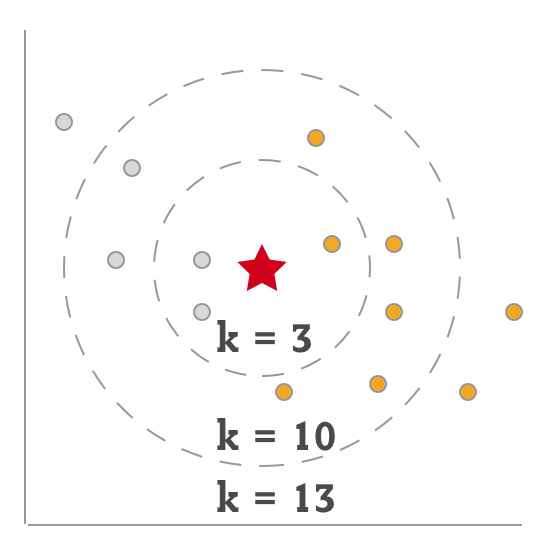

In [4]:
#==============================#
# Some more Insights
#==============================#
# The training phase of the kNN algorithm consists only of storing the 
# feature vectors and class labels of the training samples.
# In the testing phase, a test point is classified by assigning the label 
# which are most frequent among the k training samples nearest to that 
# query point – hence higher computation.

# k-NN performs much better if all of the data have the same scale 

# k-NN works well with a small number of input variables (p), but struggles 
# when the number of inputs is very large

# Let us discuss a situation to understand kNN's behavior
# Context is that you are doing a classification and using kNN for Predictive Modeling
# If you increase the k-Size, the boundary of a given point increases 
# increasing the k, you are increasing the bias
# In case of very large value of k, we may include points from other classes
# If for k=3 it predicted class-A, it might have a different outcome if k=6
# Similarly, if you decrease the size of k to 1, predictions become less stable
# If our query point is surrounded by several class Bs and just one class A
# which is a little closer than so many other class Bs, the model will predict class A

# When you are dealing with noisy data, going ahead with small k is advisable
# However, In case of too small value of k the algorithm is very sensitive to noise
# We can choose optimal value of k with the help of cross validation (always)

# kNN suffers from the curse of high-dimensionality and overfits,
# you must either do feature selection or Dimensionality reduction

# k-NN is a memory-based approach is that the classifier immediately adapts 
# as we collect new training data.

# The computational complexity for classifying new samples grows linearly with 
# the number of samples in the training dataset in the worst-case scenario

# k-NN does not require an explicit training step

# You can implement a 2-NN classifier by ensembling 1-NN classifiers

# Euclidean distance treats each feature as equally important

# The training time for any value of k in kNN algorithm is the same (obvious, right?)
# 1-NN ~ 2-NN ~ 3-NN

# In cases where we are taking a majority vote (e.g. picking the mode in a 
# classification problem) among labels, we usually make K an odd number to have a tiebreaker.

# The algorithm gets significantly slower as the volume of data increases
Image('knn_kvalue.png')

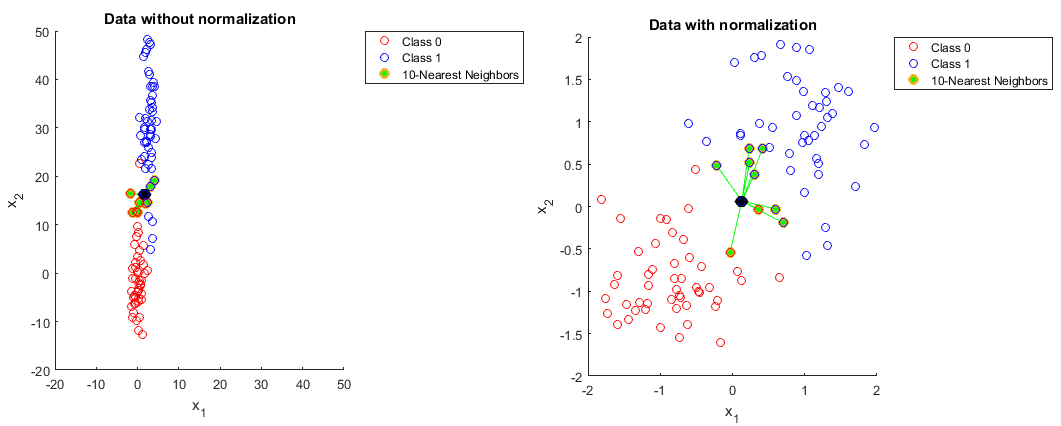

In [12]:
# What may happen if the data is not normalized. See the example below:
# Remember that kNN relies on the distance between the data points
Image('knn_data_normalization.png')

In [1]:
#==============================#
# kNN in Practice
#==============================#

# Since kNN gets slower with volume of data, it is not used that extensively for prediction
# There are so many good algorithms for classification and regression that scale well

# kNNs is best suitable in solving problems that have solutions that 
# depend on identifying similar objects. An example of this is using the 
# KNN algorithm in recommender systems, an application of KNN-search.

# kNN for recommender systems 

In [ ]:
#==============================#
# Some basics
#==============================#

# Given our movies data set, what are the 5 most similar movies to a movie query?


In [23]:
# Assuming that we already have scaled data and divided into X_train, X_test, y_train, y_test

# We are now ready to train the kNN model for Recommendation

# Import module for KNN
from sklearn.neighbors import NearestNeighbors
# Create KNN instance
knn_rec = NearestNeighbors(n_neighbors=4, algorithm='ball_tree')
# Alternatively, one can use the KDTree or BallTree classes directly to find nearest neighbors
# kdt = KDTree(X, leaf_size=30, metric='euclidean')

# Fit (i.e. traing) the model (It can take just one argument also)
knn_rec.fit(X_train)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=4, p=2, radius=1.0)

In [30]:
distances, indices = knn_rec.kneighbors(X_train)

In [31]:
distances

array([[0.        , 1.76734987, 1.92601215, 2.14037512],
       [0.        , 1.69482904, 1.77677137, 1.80835615],
       [0.        , 1.51524796, 1.78101852, 1.81458141],
       ...,
       [0.        , 1.59471376, 1.91973144, 1.948452  ],
       [0.        , 1.52628727, 1.63696573, 1.76683087],
       [0.        , 1.91311964, 1.97915637, 1.99927913]])

In [29]:
indices

array([[  0, 681, 729, 663],
       [  1, 673, 477, 674],
       [  2, 463,  90, 146],
       ...,
       [747, 595, 494, 231],
       [748, 733, 348, 715],
       [749, 471, 707, 589]], dtype=int64)

In [47]:
X_train.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
561,0.276079,1.655702,2.208756,0.456246,-0.611321,0.933389,-0.012156,1.195924,-0.292094,0.447591
112,0.507293,-1.086983,-0.388851,-0.956887,-0.482266,-0.585602,-2.185038,-0.129050,0.951419,-1.584626


In [55]:
# New data point check against our k neighbors classifier.
# To search object X and identify the closest related record, we call the kneighbors() function on the new data point
print(knn_rec.kneighbors([[1.276079, 1.655702, 1.208756, 0.456246, -1.611321, 1.233389, -2.012156, 1.495924, -1.292094, 0.447591]])) 

(array([[2.57262672, 2.63682582, 2.74143077, 2.83988477]]), array([[338, 666,  35,  77]], dtype=int64))


In [56]:
indices[0:2]

array([[  0, 681, 729, 663],
       [  1, 673, 477, 674]], dtype=int64)